In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.4 MB/s eta 0:00:50
   ---------------------------------------- 0.8/72.0 MB 1.3 MB/s eta 0:00:55
   ---------------------------------------- 0.8/72.0 MB 1.3 MB/s eta 0:00:55
    --------------------------------------- 1.0/72.0 MB 1.1 MB/s eta 0:01:05
    --------------------------------------- 1.3/72.0 MB 968.6 kB/s eta 0:01:13
    --------------------------------------- 1.3/72.0 MB 968.6 kB/s eta 0:01:13
    --------------------------------------- 1.6/72.0 MB 967.2 kB/s eta 0:01:13
   - -------------------------------------- 1.8/72.0 MB 970.7 kB/s eta 0:01:13
   - -------------------------------------- 2.1/72.0 MB 994.2 kB/s eta 0:01:11
   - -------------------------------------- 2.4/72.0 MB 1.0 MB/s eta 0:01:08
   - -------------------------------------- 2.6/72.0 MB 1.0 MB/s eta 0:01:07
   


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 1.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 758.4 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 810.1 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 810.1 kB/s eta 0:00:03
   --------------- ------------------------ 1.0/2.7 MB 839.6 kB/s eta 0:00:03
   ------------------- -------------------- 1.3/2.7 MB 854.3 kB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.7 MB 899.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.7 MB 899.2 kB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Step 1: Imports
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [6]:
# Step 2: Load Dataset
df = pd.read_csv("credit_risk_dataset.csv") 
print(df.head())

   Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      100002       1         Cash loans           M            N   
1           1      100003       0         Cash loans           F            N   
2           2      100004       0    Revolving loans           M            Y   
3           3      100006       0         Cash loans           F            N   
4           4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
0               Y             0          202500.0    406597.5  ...   
1               N             0          270000.0   1293502.5  ...   
2               Y             0           67500.0    135000.0  ...   
3               Y             0          135000.0    312682.5  ...   
4               Y             0          121500.0    513000.0  ...   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0                

In [7]:
# Step 3: Preprocessing
# Drop ID column if present
df.drop(columns=["ID"], errors="ignore", inplace=True)

In [8]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [9]:
# Encode categorical variables
df = pd.get_dummies(df)

In [12]:
X = df.drop(["TARGET", "SK_ID_CURR", "Unnamed: 0"], axis=1)
y = df["TARGET"]

In [13]:
# Step 4: Handle Class Imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [14]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [15]:
# Step 6: Train XGBoost Model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:45:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_prob))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

AUC: 0.9780587728891427
Precision: 0.9962415434728138
Recall: 0.914200817135075


In [17]:
# Step 8: SHAP Global Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

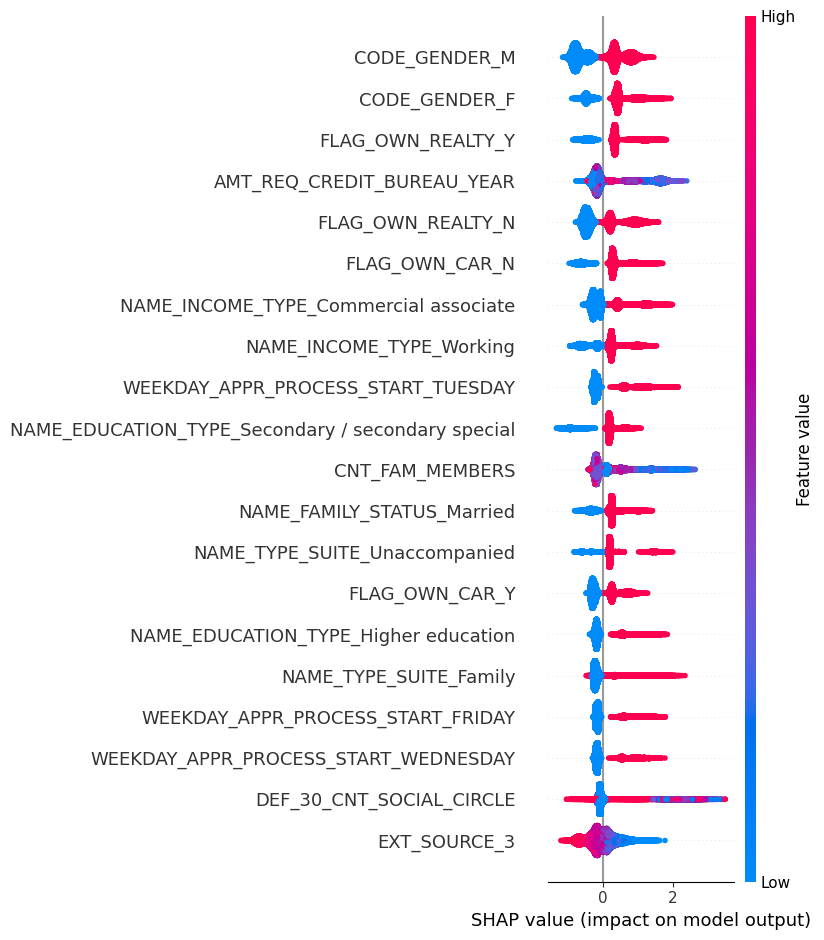

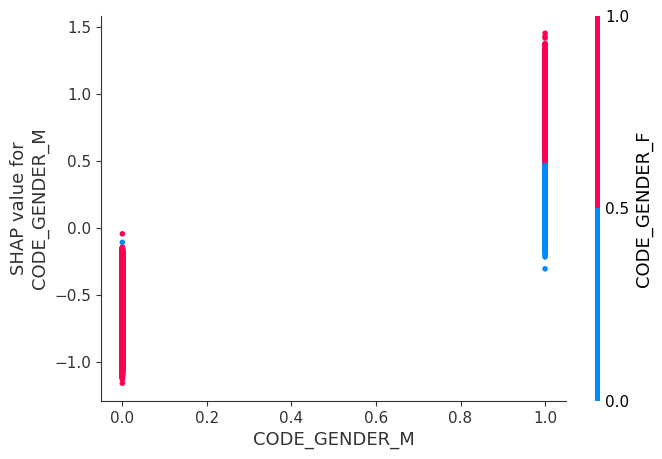

In [18]:
# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for top feature
top_feature = X_test.columns[np.argsort(np.abs(shap_values).mean(0))[-1]]
shap.dependence_plot(top_feature, shap_values, X_test)


--- High Risk Profile ---


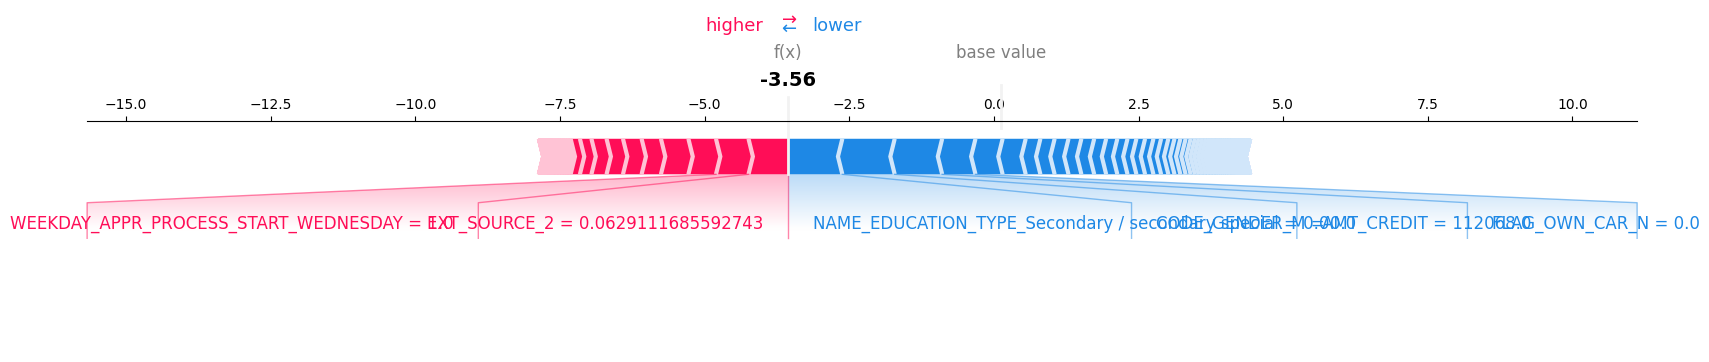

Top drivers:
NAME_EDUCATION_TYPE_Secondary / secondary special: -0.9414
CODE_GENDER_M: -0.9052
AMT_CREDIT: -0.8207
EXT_SOURCE_2: 0.6807
FLAG_OWN_CAR_N: -0.5760

--- Low Risk Profile ---


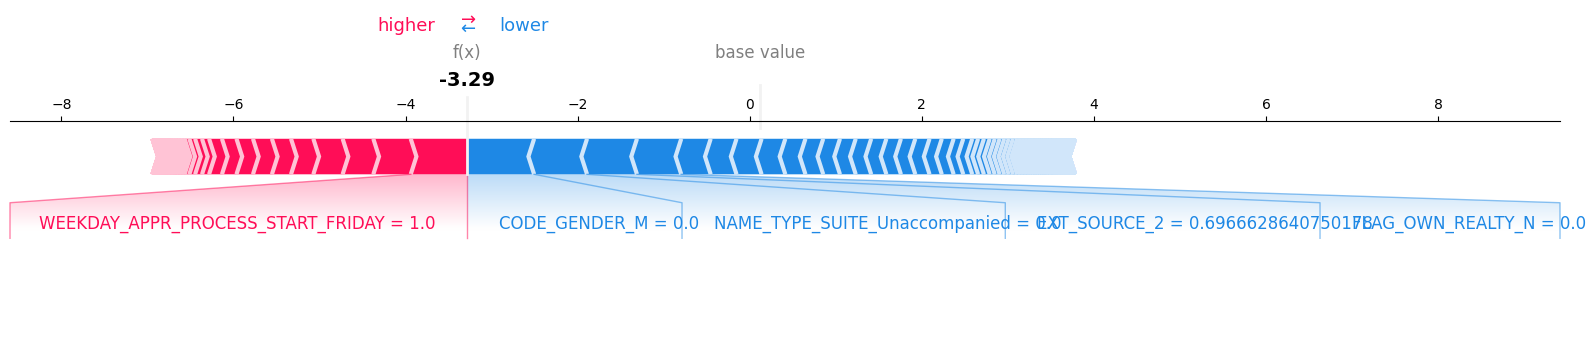

Top drivers:
CODE_GENDER_M: -0.7798
WEEKDAY_APPR_PROCESS_START_FRIDAY: 0.6542
NAME_TYPE_SUITE_Unaccompanied: -0.6149
EXT_SOURCE_2: -0.5804
FLAG_OWN_REALTY_N: -0.5145

--- Borderline Profile ---


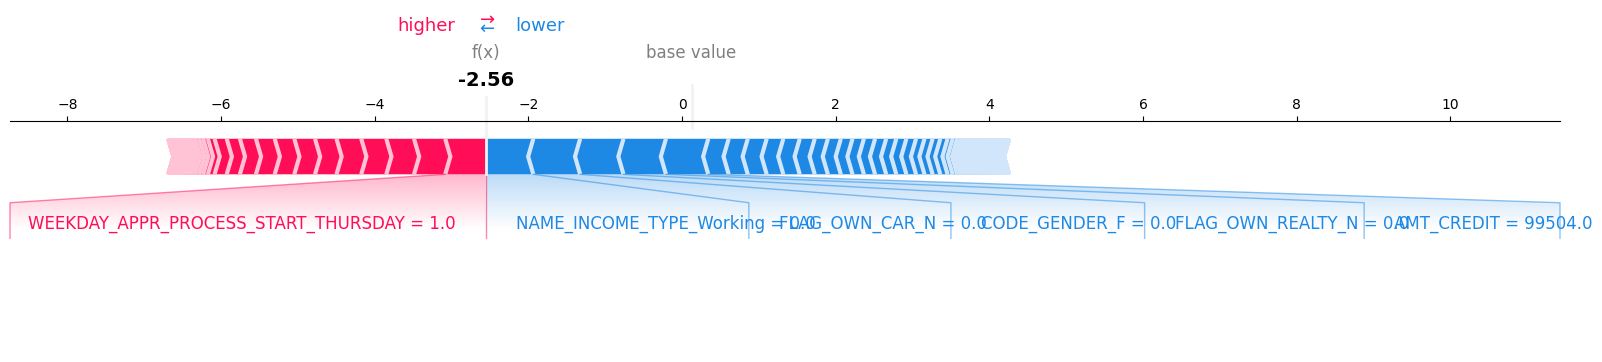

Top drivers:
NAME_INCOME_TYPE_Working: -0.6204
FLAG_OWN_CAR_N: -0.6098
CODE_GENDER_F: -0.5637
FLAG_OWN_REALTY_N: -0.5529
AMT_CREDIT: -0.5505


In [21]:
# Step 9: Local Explanations for 3 Profiles
profiles = {
    "High Risk": X_test.iloc[0],
    "Low Risk": X_test.iloc[1],
    "Borderline": X_test.iloc[2]
}

for label, instance in profiles.items():
    print(f"\n--- {label} Profile ---")
    
    # Convert Series to DataFrame with a single row
    instance_df = pd.DataFrame([instance])
    
    # Ensure all dtypes are numeric
    instance_df = instance_df.astype(float)
    
    # Compute SHAP values
    shap_val = explainer.shap_values(instance_df)
    
    # Force plot
    shap.force_plot(explainer.expected_value, shap_val, instance_df, matplotlib=True)
    
    # Print top SHAP drivers
    print("Top drivers:")
    top_features = sorted(zip(instance_df.columns, shap_val[0]), key=lambda x: abs(x[1]), reverse=True)[:5]
    for feature, value in top_features:
        print(f"{feature}: {value:.4f}")

    # After one-hot encoding and before SMOTE
    X = X.apply(pd.to_numeric, errors='coerce')
    X.fillna(0, inplace=True)
    
